In [1]:
import os
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt 

In [2]:
dset_inte = xr.open_dataset("data_inte.nc")
print(dset_inte)
dset = xr.open_dataset("data.nc")
dset

C:\Users\Lenovo\jupyter_env\lib\site-packages\xarray\backends\plugins.py:71: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


<xarray.Dataset>
Dimensions:    (time: 1, latitude: 721, longitude: 1440)
Coordinates:
  * time       (time) datetime64[ns] 2003-01-15
  * latitude   (latitude) float32 -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
Data variables:
    wvfln      (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    version:      v1.0


<xarray.Dataset>
Dimensions:    (time: 1, latitude: 721, longitude: 1440)
Coordinates:
  * time       (time) datetime64[ns] 1997-01-15
  * latitude   (latitude) float32 -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
Data variables:
    wvdiv      (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    version:      v1.0

In [7]:
import pandas as pd
df = dset.to_dataframe()
df

wvdiv
time       latitude longitude          
1997-01-15 -90.0    0.00      -0.000001
                    0.25      -0.000001
                    0.50      -0.000001
                    0.75      -0.000001
                    1.00      -0.000001
...                                 ...
            90.0    358.75    -0.000003
                    359.00    -0.000003
                    359.25    -0.000003
                    359.50    -0.000003
                    359.75    -0.000003

[1038240 rows x 1 columns]

In [9]:
df= df.reset_index()
df

time  latitude  longitude     wvdiv
0       1997-01-15     -90.0       0.00 -0.000001
1       1997-01-15     -90.0       0.25 -0.000001
2       1997-01-15     -90.0       0.50 -0.000001
3       1997-01-15     -90.0       0.75 -0.000001
4       1997-01-15     -90.0       1.00 -0.000001
...            ...       ...        ...       ...
1038235 1997-01-15      90.0     358.75 -0.000003
1038236 1997-01-15      90.0     359.00 -0.000003
1038237 1997-01-15      90.0     359.25 -0.000003
1038238 1997-01-15      90.0     359.50 -0.000003
1038239 1997-01-15      90.0     359.75 -0.000003

[1038240 rows x 4 columns]

In [18]:
df = df.drop(columns=['time','latitude','longitude'])


In [19]:
df

wvdiv
0       -0.000001
1       -0.000001
2       -0.000001
3       -0.000001
4       -0.000001
...           ...
1038235 -0.000003
1038236 -0.000003
1038237 -0.000003
1038238 -0.000003
1038239 -0.000003

[1038240 rows x 1 columns]

In [27]:
df1 = df.iloc[:20000]
df2 = df.iloc[20000:]

In [28]:
transpose_df = df1.transpose()

In [29]:
# data_wvdiv = df['wvdiv']
# df_wvdiv = data_wvdiv.to_frame()
cov_matrix = transpose_df.cov()
cov_matrix

C:\Users\Lenovo\jupyter_env\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\Lenovo\jupyter_env\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


0      1      2      3      4      5      6      7      8      9      \
0        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
19995    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
19996    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
19997    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
19998    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
19999    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

       ...  19990  19991  19992  19993  19994  19995  19996  19997  19998  \
0      ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1      ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2      ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3      ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4      ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
19995  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
19996  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
19997  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
19998  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
19999  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

       19999  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
...      ...  
19995    NaN  
19996    NaN  
19997    NaN  
19998    NaN  
19999    NaN  

[20000 rows x 20000 columns]

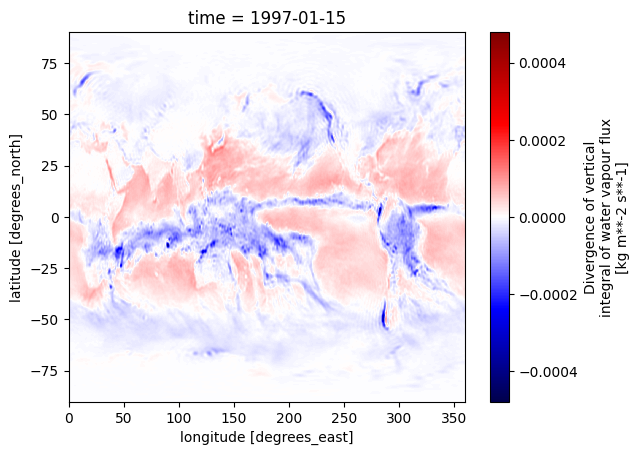

In [3]:
dset['wvdiv'].plot(cmap = 'seismic')
plt.show()

In [4]:
orig_map=plt.colormaps.get_cmap('jet')
reversed_map = orig_map.reversed()

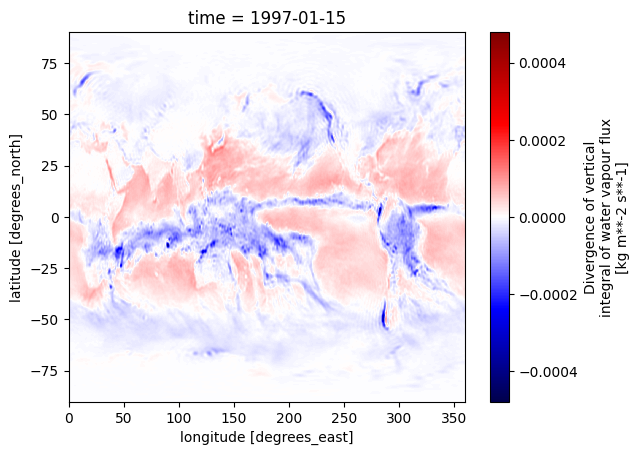

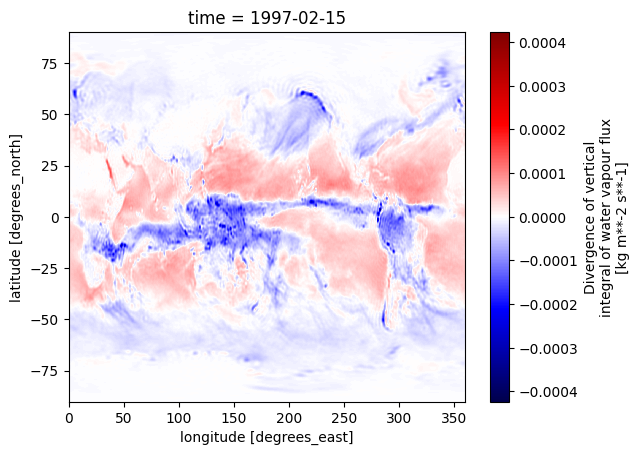

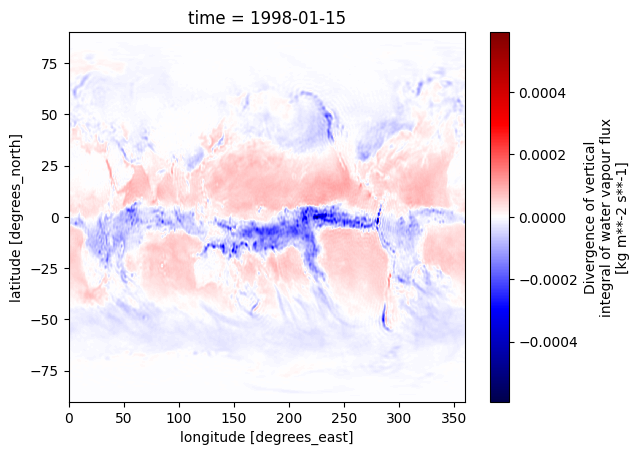

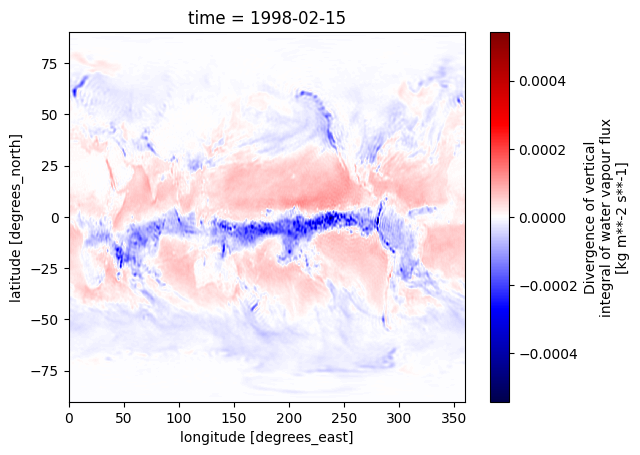

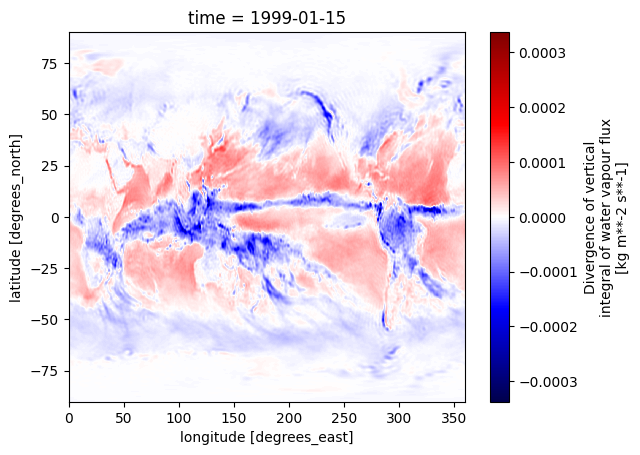

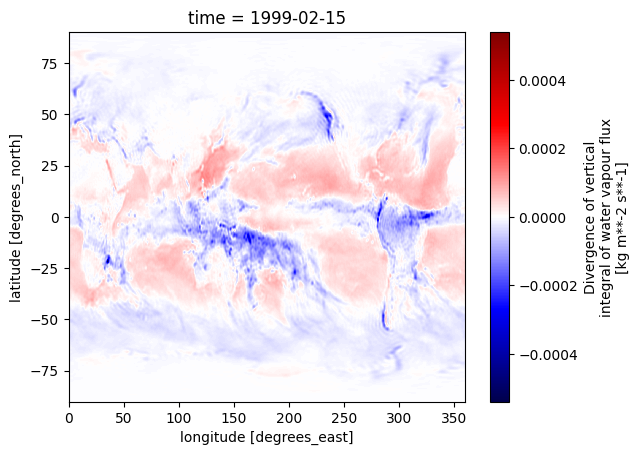

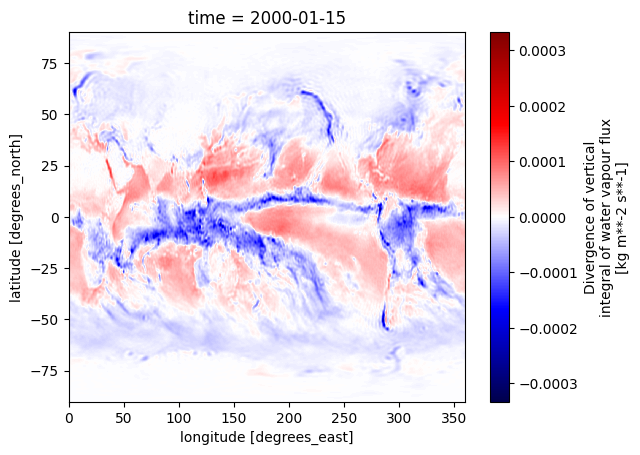

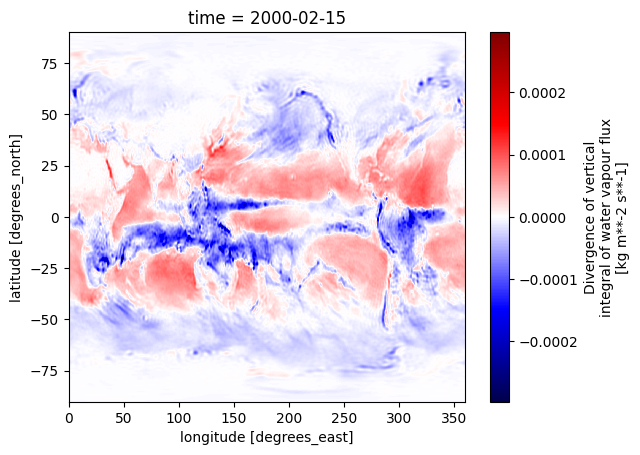

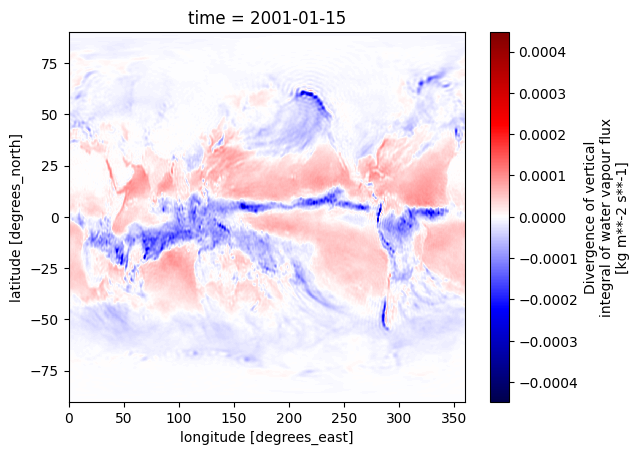

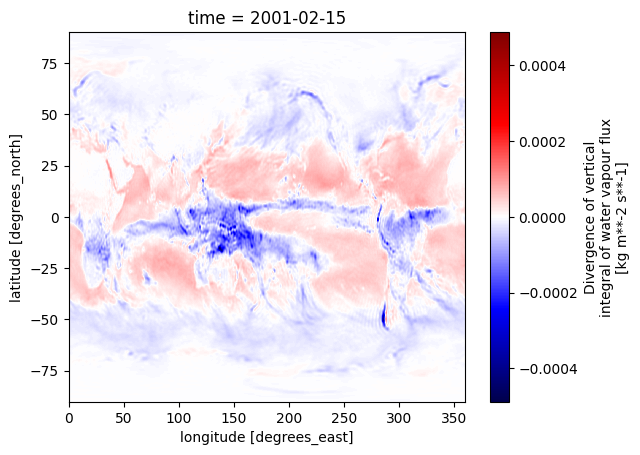

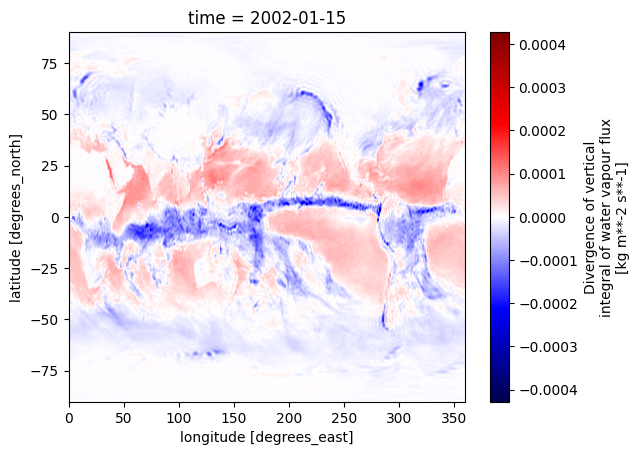

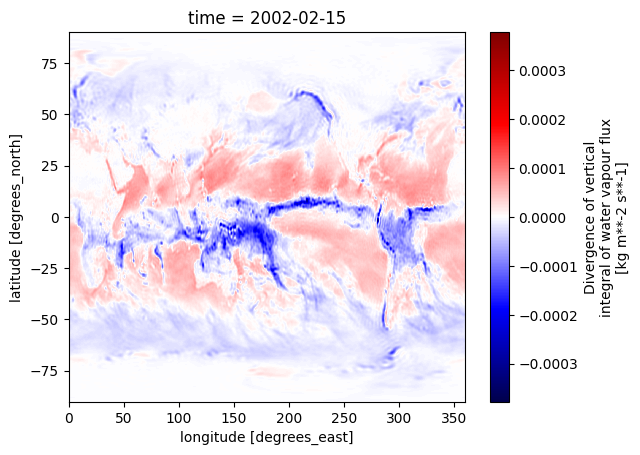

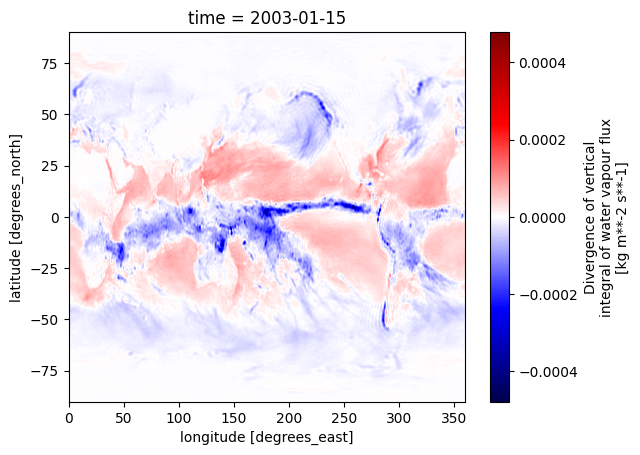

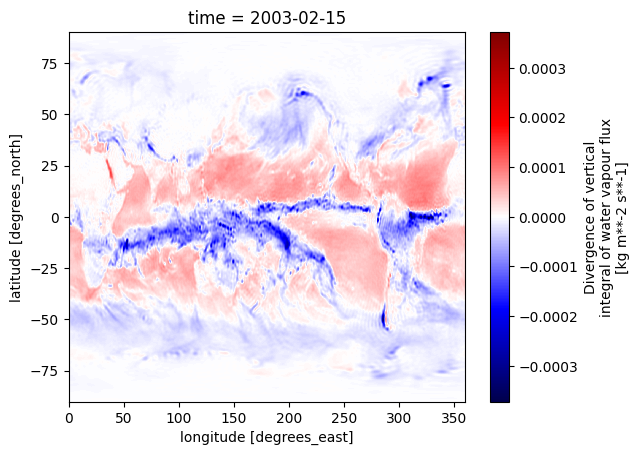

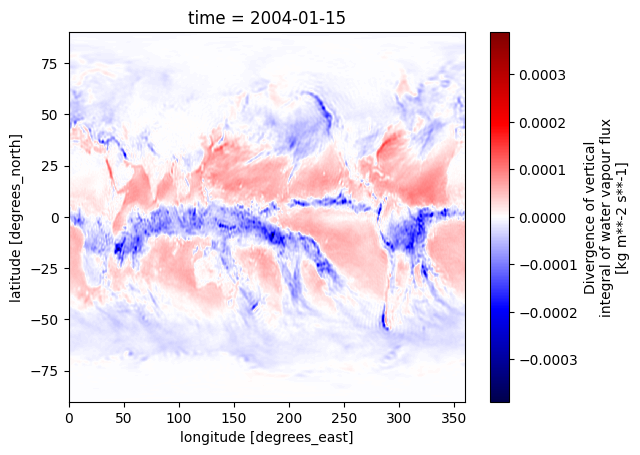

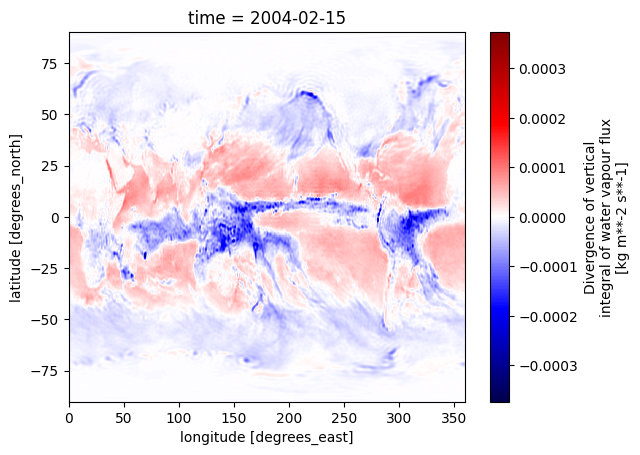

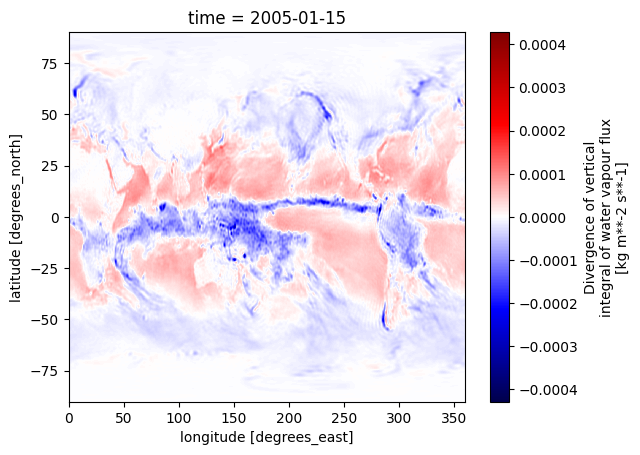

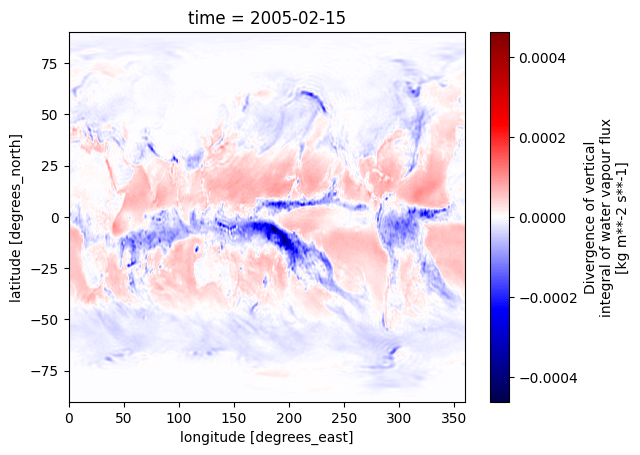

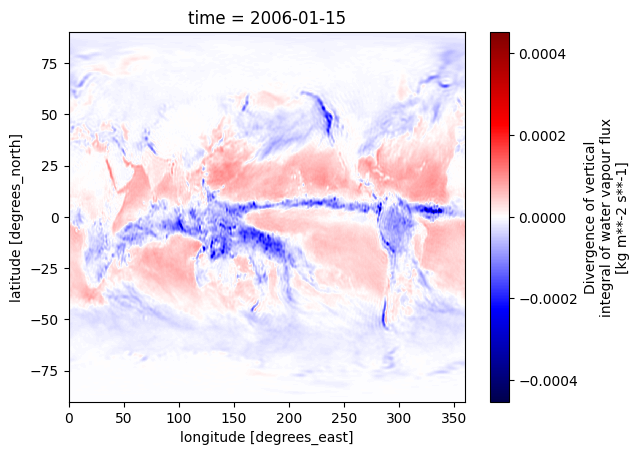

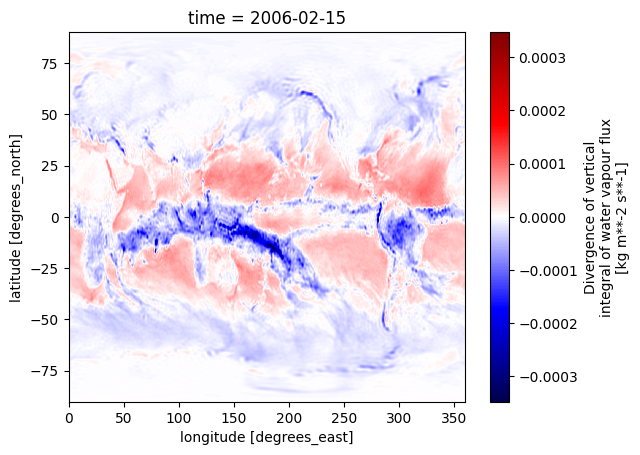

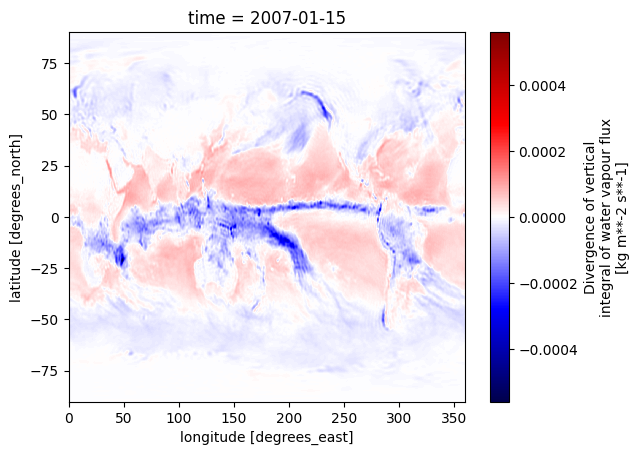

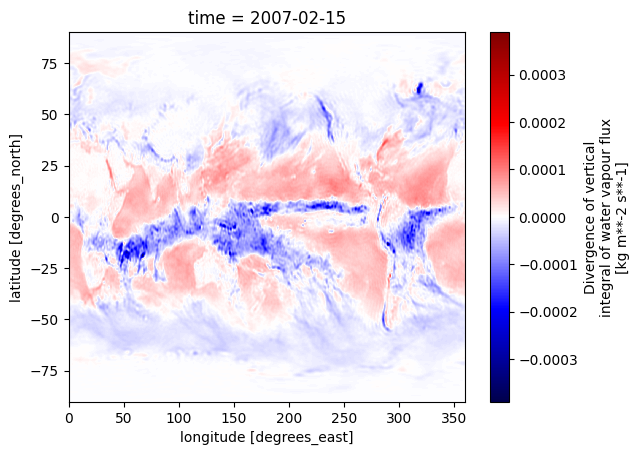

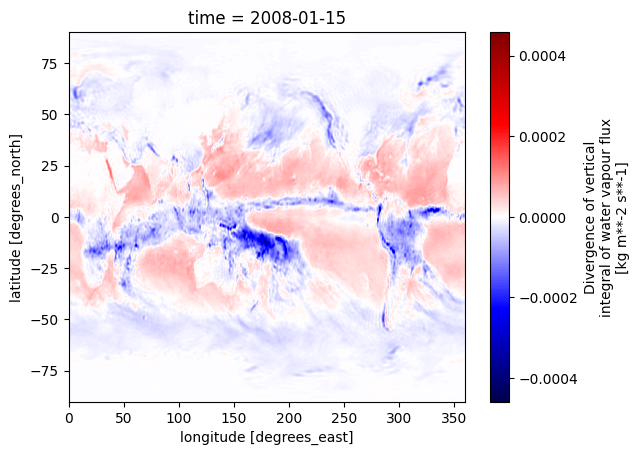

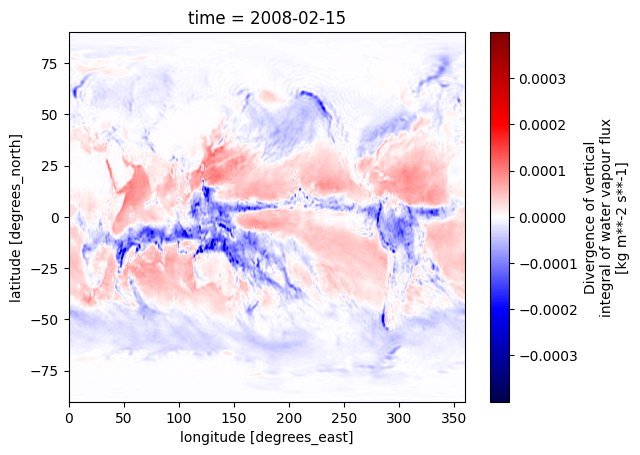

In [10]:
# directory = "C:/Users/Lenovo/Desktop/IITH/Sem 6/CDAM/Data_vertical_Inte_watervapour_flux/"
directory = "C:/Users/Lenovo/Desktop/IITH & STUDY/Sem 6/CDAM/Data_divergence_watervapour_flux/"

# fig, ax = plt.subplots(5,5)

# fig, ax = plt.subplots()
for filename in os.listdir(directory):
    
    f = os.path.join(directory, filename)
# for file in path:
    dset = xr.open_dataset(f)
#     dset['wvfln'].plot(cmap = 'seismic')
    dset['wvdiv'].plot(cmap = 'seismic')
#     fig, ax = plt.subplots()
#     world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
#     dset['wvdiv'].plot() # <--- pass ax=ax here
#     world.plot(ax=ax) # <--- pass ax=ax here
#     plt.xlim(-6,2)
#     plt.ylim(-2.5,2.5)
    
#     fig.clear()
    plt.show()
#     plt.pause(0.01)

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world.plot(ax= ax)
plt.grid(linestyle='-', linewidth=0.5)
plt.show()